In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv ("/home/hadiii/python3/drug200.csv")
print('Shape:', df.shape)
display(df.head(10))
display(df.describe())
display(df.info())


Shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


None

In [11]:
le_sex = LabelEncoder()
df['Sex_enc'] = le_sex.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['BP','Cholesterol'], drop_first=False)

le_drug = LabelEncoder()
df['Drug_enc'] = le_drug.fit_transform(df['Drug'])
display(df.head(10))


,Age,Sex,Na_to_K,Drug,Sex_enc,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_enc
0,23,F,25.355,drugY,0,True,False,False,True,False,4
1,47,M,13.093,drugC,1,False,True,False,True,False,2
2,47,M,10.114,drugC,1,False,True,False,True,False,2
3,28,F,7.798,drugX,0,False,False,True,True,False,3
4,61,F,18.043,drugY,0,False,True,False,True,False,4
5,22,F,8.607,drugX,0,False,False,True,True,False,3
6,49,F,16.275,drugY,0,False,False,True,True,False,4
7,41,M,11.037,drugC,1,False,True,False,True,False,2
8,60,M,15.171,drugY,1,False,False,True,True,False,4
9,43,M,19.368,drugY,1,False,True,False,False,True,4


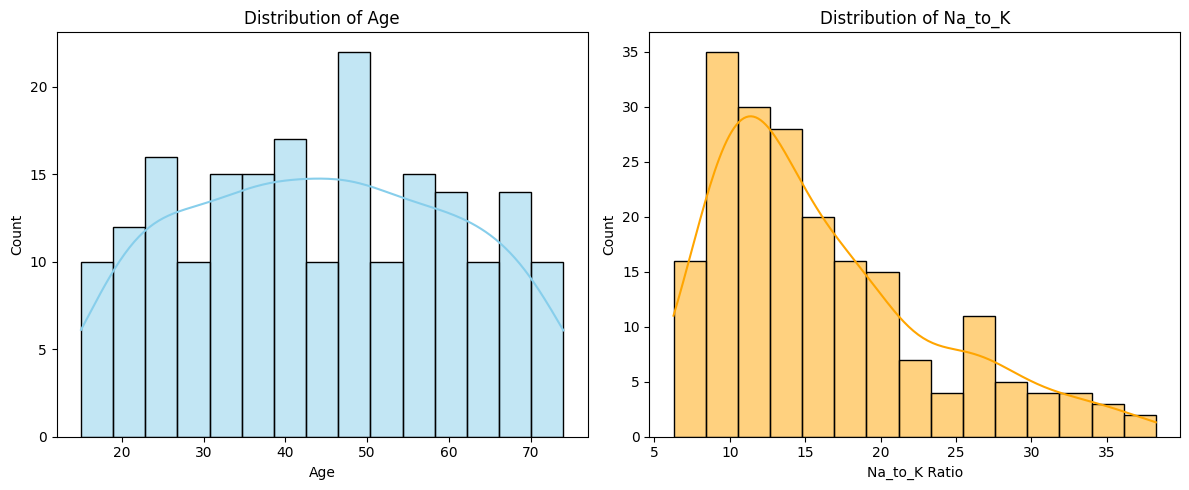

In [14]:
feature_cols = ['Age','Sex_enc','Na_to_K'] + [c for c in df.columns if c.startswith('BP_') or c.startswith('Cholesterol_')]
X = df[feature_cols]
y = df['Drug_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(df['Na_to_K'], bins=15, kde=True, color='orange')
plt.title('Distribution of Na_to_K')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

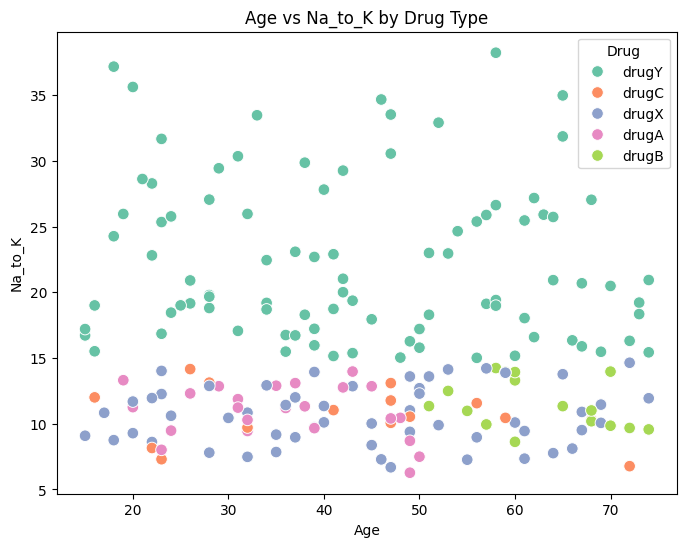

In [15]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Age','Na_to_K']] = scaler.fit_transform(X_train[['Age','Na_to_K']])
X_test_scaled[['Age','Na_to_K']] = scaler.transform(X_test[['Age','Na_to_K']])
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=df, palette='Set2', s=70)
plt.title('Age vs Na_to_K by Drug Type')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.legend(title='Drug')
plt.show()

In [16]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print('Accuracy:', round(acc,4))
print('Precision (macro):', round(prec_macro,4))
print('Recall (macro):', round(rec_macro,4))
print('F1-score (macro):', round(f1_macro,4))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, target_names=le_drug.classes_, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 0.975
Precision (macro): 0.9667
Recall (macro): 0.9333
F1-score (macro): 0.9418

Classification Report:

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40

Confusion matrix:
 [[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


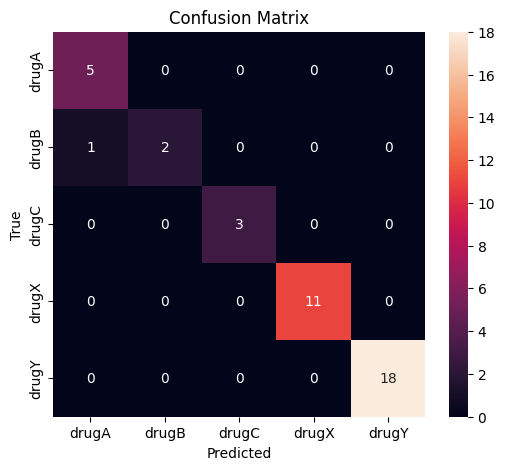

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

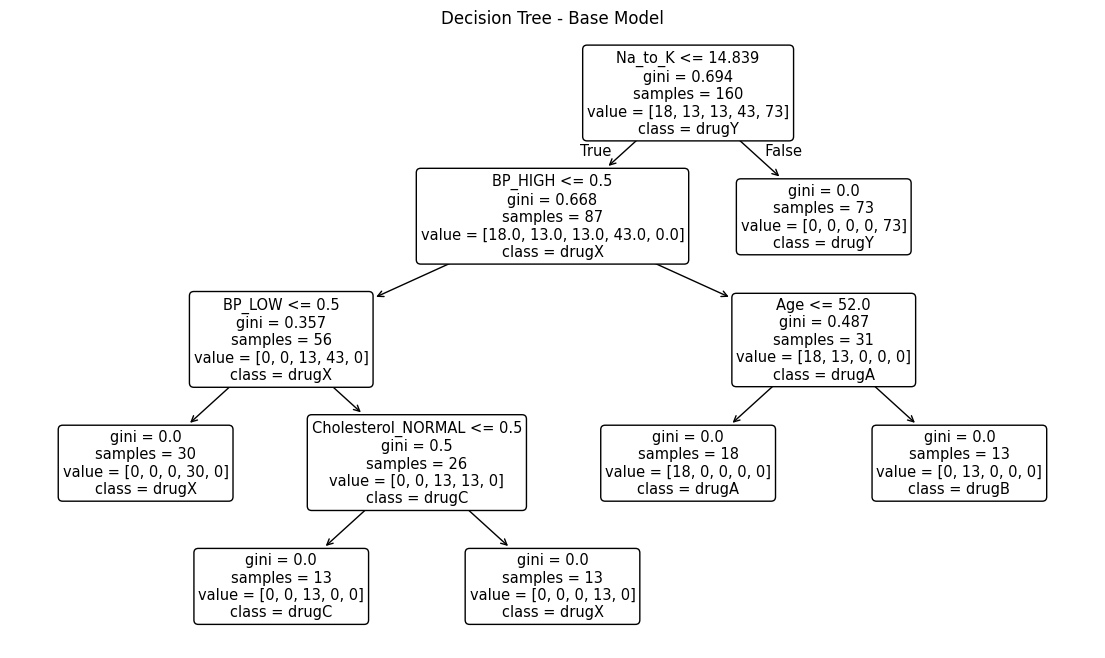

In [19]:
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=feature_cols, class_names=le_drug.classes_, filled=False, rounded=True)
plt.title('Decision Tree - Base Model')
plt.show()